# Open Food Facts
# Big Data project -CS 696 
                                        

#### About Dataset
---------------------------
Open Food Facts is a database of food and cosmetic products with ingredients, allergens, nutrition facts and all the data we can find on product labels.
Dataset website: https://world.openfoodfacts.org/
The dataset can be downloaded  from https://static.openfoodfacts.org/data/en.openfoodfacts.org.products.csv

###### The dataset has 181 columns out of which we have taken only the columns which we need in different cleaned CSV. We made a separate file for cleaning the dataset named datacleaning.ipynb to avoid the confusion. Link shared here,please download from google drive.

https://drive.google.com/file/d/11ApZBb2jtqULBfVPg8yMUIL6FErF-bcI/view?usp=sharing

 In this project,we  have applied the machine learning algorithms for analysing the nutrient factors for products available in this dataset. 

#### Questions we analyzed using this dataset are as follows:


1)America's Top 10 Food products that contains maximum bad Fat per 100gm.Plot a graph. 

2)Find out the United state's Food products that has more than 100 ingredients per each product ,Show in a table along with calorie values.

3)Find the percentage of additive and palm oil count in the food worldwide.Plot them in pie plot.

4)Compare 10 brands and 10 categories most common in France an United States. Plot in bar plot.

5)Findout the relationship between the nutritional score and the other variables of nutrient profiles such as carbs,sugar,salt,sodium,additives,energy etc in the highest consumed Food category.Which variable affect the most to the nutritional score?Produce a heatmap.

6)Design a model on Decision tree classifier that based on the nutrient profiles of food to predict healthy or unhealthy using spark MLlib.Check the accuracy score.

7)Show the categorial value of nutrition grade with each of the category in energy,sugar,carbohydrate and protein In United States.Showin violin plot. 

8)Design a logistic regression model that can predict additive contains present or not inanalysying its caloric values and nutrition score.

9)Which is the most widely used packaging type in the world? In which country most plastic packaging is used? Find top 10 eco-friendly countries?

10)What is the amount of alcohol content in products?

11)Can Products termed organic always be categorized healthy?

12)Find top 10 ingredients in food products.

13)3d Scatter plot by food grade using amounts of protein, carbohydrate, and fat

#### Issues:
Since the dataset has comma separated values in some of the columns, we used  a pandas method and function which is splitting the commas from columns to separate the values adding in new rows ,we used the method in some of the questions But,as the data is huge .We have tries stack method in some question to resolve the problem too.this process is bit more time consuming . 

#### Data dictionary: 

'Code' : code for each product

'Product_name' : name of the product

'Packaging' : packaging material of product

'Packaging_tags': tags of the packaging material

'Brands': brands of the product

'Main_category_en’: category of products (eg. mustards, biscuits)

‘Nutriscore_grade' : grade of the products in letter 

'Nutriscore_score' : grade of the products in number

'Categories_en' : category of products (eg. mustards, biscuits)

'Labels_tags' : labels of products (eg, organic, overall, vegan etc.)

'Serving_size' : Serving size of the product

'Countries_en': countries

 'Ingredients_text' : ingredients present in the products
 
'Ingredients_from_palm_oil_n' : ingredients made from palm oil

'Additives_n': additives present in products

'energy_100g', 'alcohol_100g', 'proteins_100g', 'fiber_100g', 'salt_100g', 'sodium_100g', 'sugars_100g', 'trans-fat_100g', 'Cholesterol_100g', 'carbohydrates_100g', 'saturated-fat_100g',  'Fat_100g' : nutrients available in products
      


In [753]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pylab as plt
from pandas import Series,DataFrame
import seaborn as sns
from IPython.display import display
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_rows', None)
from collections import Counter
from pandas.plotting import scatter_matrix
from subprocess import check_output
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans

In [755]:
open_food_facts=pd.read_csv('openfoodfactnew.csv', low_memory=False)

In [756]:
open_food_facts.shape

(1369337, 27)

In [757]:
open_food_facts=open_food_facts.drop_duplicates()
open_food_facts['countries_en'] = open_food_facts['countries_en'].str.lower()
open_food_facts.shape

(1369286, 27)

Reading the cleaned csv below

In [758]:
open_food_facts.head()

,code,product_name,packaging,packaging_tags,energy_100g,brands,alcohol_100g,proteins_100g,fiber_100g,salt_100g,...,saturated_fat_100g,fat_100g,categories_en,labels_tags,countries_en,ingredients_text,ingredients_from_palm_oil_n,additives_n,nutriscore_score,categories_en.1
0,0000000000017,Vitória crackers,NaN,NaN,1569.0,NaN,0.0,7.8,0.0,1.4,...,3.08,7.0,NaN,NaN,france,NaN,0.0,0.0,0.0,NaN
1,0000000000031,Cacao,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,...,0.00,0.0,NaN,NaN,france,NaN,0.0,0.0,0.0,NaN
2,000000000003327986,Filetes de pollo empanado,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,...,0.00,0.0,NaN,NaN,spain,NaN,0.0,0.0,0.0,NaN
3,0000000000100,moutarde au moût de raisin,NaN,NaN,936.0,courte paille,0.0,5.1,0.0,4.6,...,2.20,8.2,"Groceries,Condiments,Sauces,Mustards",fr:delois-france,france,eau graines de téguments de moutarde vinaigre ...,0.0,0.0,18.0,"Groceries,Condiments,Sauces,Mustards"
4,00000000001111111111,Sfiudwx,NaN,NaN,0.0,Watt,0.0,0.0,0.0,0.0,...,0.00,0.0,fr:xsf,NaN,france,NaN,0.0,0.0,0.0,fr:xsf


Question 1 
-----------------

America's Top 10 Food products that contains maximum bad Fat per 100gm.Plot a graph

In [759]:
columns_to_keep=['countries_en','product_name','trans_fat_100g','saturated_fat_100g']
fat_content_df=open_food_facts[columns_to_keep]
fat_content_df=fat_content_df.dropna()

In [760]:
fat_content_df.head()

,countries_en,product_name,trans_fat_100g,saturated_fat_100g
0,france,Vitória crackers,0.0,3.08
1,france,Cacao,0.0,0.00
2,spain,Filetes de pollo empanado,0.0,0.00
3,france,moutarde au moût de raisin,0.0,2.20
4,france,Sfiudwx,0.0,0.00


Choosing united states dats from countries table and summing up the bad fats that contains saturated fat and bad fats ij the product fro 100gm

In [761]:
usafood_fat_content= fat_content_df[fat_content_df['countries_en'].str.contains("united states")]
usafood_fat_content=usafood_fat_content[usafood_fat_content['product_name']!='Required']
usafood_fat_content.loc[:,'badfatties']=(usafood_fat_content.loc[:,'trans_fat_100g']+usafood_fat_content.loc[:,'saturated_fat_100g'])

In [762]:
top10_food_badfatties=usafood_fat_content.nlargest(10,['trans_fat_100g','saturated_fat_100g'])
top10_food_badfatties

,countries_en,product_name,trans_fat_100g,saturated_fat_100g,badfatties
21132,united states,12 Round Roasted Pepper And Smoked Mozzarella ...,369.00,1.90,370.90
175382,united states,Pinto Beans,130.00,0.00,130.00
175384,united states,Roman Beans,130.00,0.00,130.00
293035,united states,"Gourmet Ice Cream, Maple Nut",110.00,6.09,116.09
172586,united states,"Delallo, hearts of palm",83.00,0.00,83.00
339805,united states,"Pastariso, Brown Rice Pasta, Fettucine",56.00,0.00,56.00
324562,united states,Sliced almonds,53.57,3.57,57.14
394625,united states,"Attitude fraiche, spring mix",50.00,0.00,50.00
394626,united states,"Fresh attitude, baby spinach",50.00,0.00,50.00
394627,united states,"Attitude fraiche, arugula roquette",50.00,0.00,50.00


Plotting for above in barh

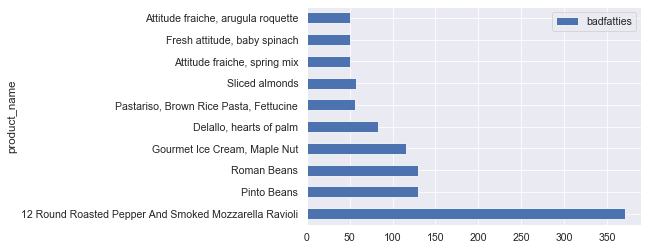

In [763]:
top10_food_badfatties.plot.barh('product_name','badfatties')


Question 2
--------------
Find out the United state's Food products that has more than 100 ingredients per each product ,Show in a table along with calorie values


In [764]:
columns_to_keep=['countries_en','product_name','energy_100g','carbohydrates_100g','fat_100g','proteins_100g', 'sugars_100g','salt_100g','ingredients_text','saturated_fat_100g']
ingredient_table=open_food_facts[columns_to_keep]
ingredient_table=ingredient_table.dropna()
ingredient_table.head()


,countries_en,product_name,energy_100g,carbohydrates_100g,fat_100g,proteins_100g,sugars_100g,salt_100g,ingredients_text,saturated_fat_100g
3,france,moutarde au moût de raisin,936.0,29.0,8.2,5.1,22.0,4.600,eau graines de téguments de moutarde vinaigre ...,2.2
20,france,Solène céréales poulet,916.0,30.3,5.9,9.7,1.7,0.464,"antioxydant : érythorbate de sodium, colorant ...",0.5
27,france,Crème dessert chocolat,0.0,0.0,0.0,0.0,0.0,0.000,"Lait entier, sucre, amidon de maïs, cacao, Aga...",0.0
35,france,Baguette Poitevin,866.0,27.5,6.7,8.9,0.6,0.400,"baguette Poite vin Pain baguette 50,6%: farine...",3.8
45,france,Suedois saumon,720.0,23.3,4.4,8.4,4.6,3.580,"Paln suédois 42,6%: farine de BLÉ, eau, farine...",1.2


In [765]:
usafoodfact_ingredient= ingredient_table[ingredient_table['countries_en'].str.contains("united states")]

After choosing the United States rows,We observed,ingredients are mentioned in commas followed by each other,So used str.split separate all ingredents and adding the value in lenght as number of ingredients in #ingredient column 

In [766]:
usafoodfact_ingredient.loc[:,'#ingredients']= usafoodfact_ingredient.loc[:,'ingredients_text'].str.split(',').str.len()
usafoodfact_ingredient=usafoodfact_ingredient.dropna(subset=['#ingredients']) 
usafoodfact_ingredient['#ingredients']=usafoodfact_ingredient['#ingredients'].astype(int)
usafoodfact_ingredient.index = range(len(usafoodfact_ingredient))
usafoodfact_ingredient[['ingredients_text', '#ingredients']][:5]

,ingredients_text,#ingredients
0,"Bananas, vegetable oil (coconut oil, corn oil ...",4
1,"Peanuts, wheat flour, sugar, rice flour, tapio...",13
2,"Organic hazelnuts, organic cashews, organic wa...",5
3,Organic polenta,1
4,"Rolled oats, grape concentrate, expeller press...",9


Following shows the product products that conytans more than 100 ingredients in each

In [768]:
usa_ingredient_morethan10=usafoodfact_ingredient[usafoodfact_ingredient['#ingredients'] >100 ]
usa_ingredient_morethan10

,countries_en,product_name,energy_100g,carbohydrates_100g,fat_100g,proteins_100g,sugars_100g,salt_100g,ingredients_text,saturated_fat_100g,#ingredients
615,united states,Large king cake filled with strawberry and cre...,0.0,0.00,0.00,0.00,0.00,0.00000,"Cake: enriched flour (wheat flour, wheat starc...",0.00,116
1804,united states,"12 slice variety cheesecake, chocolate chip, r...",1469.0,39.36,20.21,4.26,24.47,0.63750,"Cream cheese [cultured cream and milk, salt, x...",8.51,120
2771,united states,"Cheese flavored corn sticks, pretzels, rice cr...",1833.0,68.75,15.62,9.38,6.25,2.57750,Cheese flavored corn sticks (yellow corn masa ...,1.56,115
3031,united states,Creamstyle Assorted Cheesecake,1556.0,37.23,22.34,6.38,23.40,0.63750,"Cream cheese (milk, cream, cheese culture, sal...",12.77,111
4359,united states,Classic Crispy Crust Pizza,1046.0,31.37,10.78,7.84,1.96,1.12750,"Crust: enriched flour (wheat flour, malted bar...",3.43,101
4360,united states,Classic Crispy Crust Microwave Pizza,1004.0,31.37,9.80,7.35,2.45,1.06500,"Crust: enriched flour (wheat flour, malted bar...",3.43,102
4570,united states,Boneless Wyngz,996.0,25.00,9.52,13.10,3.57,2.20250,"Chicken breast meat with rib meat, enriched bl...",1.79,102
4883,united states,Cheese Danish Strip,1757.0,52.00,22.00,6.00,26.00,0.85000,"Enriched flour (wheat flour, malted barley flo...",10.00,101
5539,united states,Pals combination pizza,1054.0,31.97,10.20,7.48,2.04,1.07250,"Crust: enriched flour (wheat flour, malted bar...",3.40,103
5540,united states,Pizza,996.0,31.97,8.84,6.80,2.04,1.00250,"Crust: enriched flour (wheat flour, malted bar...",3.06,106


Question 3
---------------
## Find the percentage of additive and palm oil count in the food worldwide.Plot them in pie plot


In [769]:
columns_to_keep=['product_name','additives_n','ingredients_from_palm_oil_n']
additive_palmoilcheck=open_food_facts[columns_to_keep]
additive_palmoilcheck=additive_palmoilcheck.dropna()

Additives that has more than 0 value shows 1 else shows 0 in one extra column named additives_present.And group by count those values  will give us percentage and shows in pie plot

In [770]:
additive_palmoilcheck.loc[:,"additives_present"] = np.where(additive_palmoilcheck['additives_n']>0.0, 1, 0)

In [771]:
products_contains_additives=additive_palmoilcheck["additives_present"].groupby(additive_palmoilcheck["additives_present"]).count()
products_contains_additives

additives_present
0    945399
1    362809
Name: additives_present, dtype: int64

In [772]:
additive_palmoilcheck.loc[:,"Palmoil_present"] = np.where(additive_palmoilcheck["ingredients_from_palm_oil_n"] > 0.0, 1, 0)

products_contains_palmoil=additive_palmoilcheck["Palmoil_present"].groupby(additive_palmoilcheck["Palmoil_present"]).count()
products_contains_palmoil


Palmoil_present
0    1295422
1      12786
Name: Palmoil_present, dtype: int64

In [773]:
products_contains_palmoil.index=["palm oil absent","palm oil present"]
products_contains_additives.index=["additives absent","additives present"]

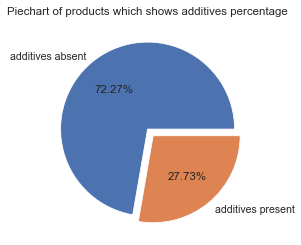

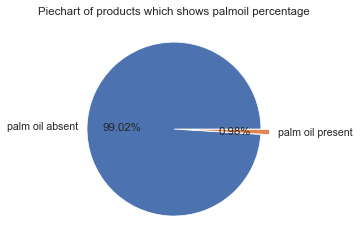

In [774]:
def plotadditive_palmoil(datacount,title,exp):
    plt.gca().set_aspect("equal")
    plt.pie(datacount,labels=datacount.index, autopct = "%.2f%%",explode=exp,radius=1)
    plt.title(title)
    plt.show()

plotadditive_palmoil(products_contains_additives,"Piechart of products which shows additives percentage",(0,0.1))
plotadditive_palmoil(products_contains_palmoil,"Piechart of products which shows palmoil percentage",(0,0.1))

Question 4
------------
Compare 10 brands and 10 categories most common in France an United States.Plot in bar plot


In [775]:
columns_to_keep=['countries_en','brands','main_category_en']
brand_category_df=open_food_facts[columns_to_keep]
brand_category_df=brand_category_df.dropna()

First filtered the usa and france rows and counte the total brands of each coutry and plotted below ,same done for categories

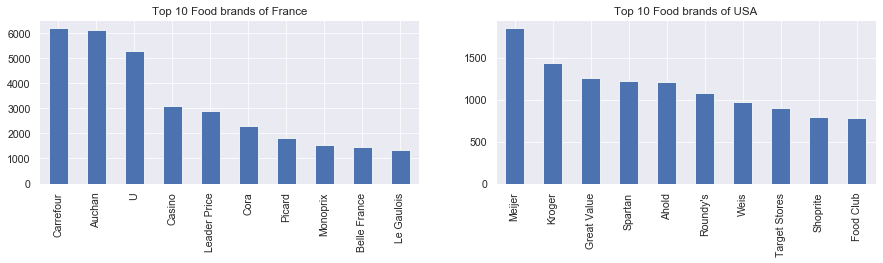

In [776]:
country_usa = brand_category_df[brand_category_df['countries_en'].str.contains("united states")]
country_france = brand_category_df[brand_category_df['countries_en'].str.contains("france")]

fig = plt.figure(figsize=(15,3))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

brands_france = country_france['brands'].value_counts()
brands_usa = country_usa['brands'].value_counts()
brands_france[0:10].plot(kind='bar', ax=ax1, title="Top 10 Food brands of France")
brands_usa[0:10].plot(kind='bar', ax=ax2, title="Top 10 Food brands of USA")
plt.show()

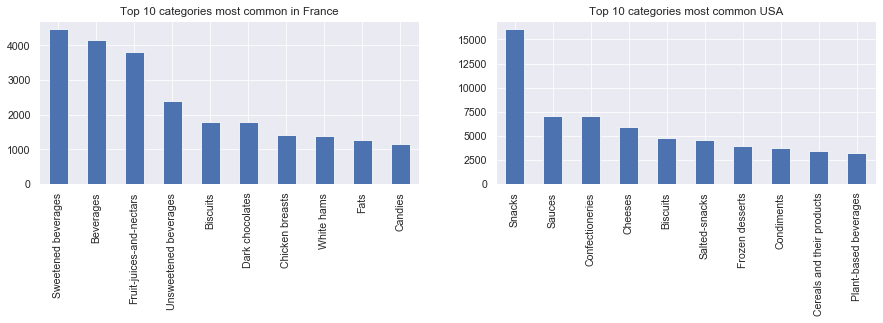

In [777]:
fig = plt.figure(figsize=(15,3))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

foodcategories_fr = country_france['main_category_en'].value_counts()
foodcategories_usa = country_usa['main_category_en'].value_counts()

foodcategories_fr[0:10].plot(kind='bar', ax=ax1, title="Top 10 categories most common in France")
foodcategories_usa[0:10].plot(kind='bar', ax=ax2, title="Top 10 categories most common USA")
plt.show()

Question 5
-----------

Findout the relationship between the nutritional score and the other variables of nutrient profiles such as carbs,sugar,salt,sodium,additives,energy etc in the highest consumed Food category.Which  variable affect the most to the nutritional score?Produce a heatmap.

In [778]:
Maincategory_df=open_food_facts['main_category_en'].value_counts()
datacount_categorywise=Maincategory_df.to_frame(name='totalcount').reset_index().rename(columns = {'index':'maincategory'})
datacount_categorywise.head()

,maincategory,totalcount
0,Snacks,32846
1,Sauces,15546
2,Confectioneries,14931
3,Cheeses,13575
4,Biscuits,12682


The total highest count of Category from the value count and getting the index of that category shows the highest consumed food 

In [779]:
highest_consumed_foodcat=datacount_categorywise.loc[datacount_categorywise['totalcount'].idxmax()]
print("The highest Consumed food category is:"+ highest_consumed_foodcat.maincategory)

The highest Consumed food category is:Snacks


THe selected category has nan values ,So taking a notnan amount that will drop the nan values for the evaluation and filling the nutrition score those are not nutrition coulmns

In [780]:
selected_consumed_category= open_food_facts[open_food_facts['main_category_en'].isin([highest_consumed_foodcat.maincategory])] 

notnan = 0.5 
nutritionscore_table = selected_consumed_category.select_dtypes('number').dropna(axis=1, thresh = int(len(selected_consumed_category)*notnan)).dropna(how='all').dropna(subset=['nutriscore_score'])
nutritionscore_table.loc[:,nutritionscore_table.columns != 'nutriscore_score'] = nutritionscore_table.loc[:,nutritionscore_table.columns != 'nutriscore_score'].fillna(0)
nutritionscore_table.head()


,energy_100g,alcohol_100g,proteins_100g,fiber_100g,salt_100g,sodium_100g,sugars_100g,trans_fat_100g,cholesterol_100g,carbohydrates_100g,saturated_fat_100g,fat_100g,ingredients_from_palm_oil_n,additives_n,nutriscore_score
839,2209.0,0.0,8.00,2.0,0.40,0.160,49.60,0.0,0.0,60.00,18.4,28.00,0.0,1.0,25.0
1035,1343.0,0.0,0.00,7.1,0.09,0.036,64.29,0.0,0.0,78.57,0.0,0.00,0.0,3.0,0.0
1076,1494.0,0.0,3.57,10.7,0.00,0.000,75.00,0.0,0.0,92.86,0.0,0.00,0.0,0.0,9.0
1077,1343.0,0.0,3.57,14.3,0.00,0.000,64.29,0.0,0.0,85.71,0.0,0.00,0.0,0.0,8.0
1078,1494.0,0.0,3.57,10.7,0.00,0.000,78.57,0.0,0.0,89.29,0.0,1.79,0.0,0.0,2.0


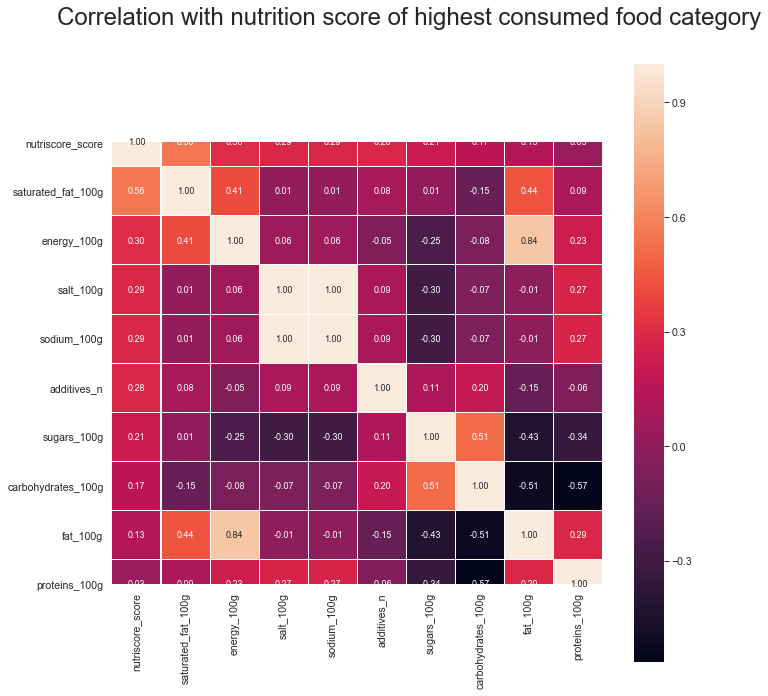

In [781]:
corrmatrix = nutritionscore_table.corr()
sns.set(context="paper", font_scale = 1.2)
figure, ax = plt.subplots(figsize=(11, 11))
nutricols = corrmatrix.nlargest(10, 'nutriscore_score')['nutriscore_score'].index
nutri_matrix = corrmatrix.loc[nutricols, nutricols] 
nutri_heatmap = sns.heatmap(nutri_matrix, cbar=True, annot=True, square=True,fmt='.2f', annot_kws={'size': 9}, linewidth = 0.1,
                 yticklabels=cols.values, xticklabels=cols.values, )
figure.text(0.5, 0.93, "Correlation with nutrition score of highest consumed food category", ha='center', fontsize = 24)
plt.show()

From the above heatmap,we can conclude sodium and salt are the same contribution factors.Saturated fat,followed by has the highest  contribution followed by energy

# Machine Learning Models

Question 6
----------
Design a model on Decision tree classifier that based on the nutrient profiles of food to predict healthy or unhealthy using sparl MLlib.Check the accuracy score.

Taking the required columns for analysis

In [782]:
columns_tobetaken = ['code', 'additives_n', 'energy_100g', 'fat_100g', 'fiber_100g', 'proteins_100g','sugars_100g','sodium_100g', 'salt_100g', 'carbohydrates_100g', 'nutriscore_grade']
model_data = open_food_facts[columns_tobetaken]
model_data=model_data.dropna()
model_data.reset_index(inplace=True, drop=True)
model_data.shape

(563368, 11)

In model data ,we are training the data on is_healthy column based on if the nutrition grade is above a & b then good is healthy else no

In [783]:
model_data['is_healthy'] = model_data.nutriscore_grade.apply(lambda x: 'yes' if x in ['a', 'b'] else 'no')
model_data.is_healthy = model_data.is_healthy.astype('category')
model_data.drop(['nutriscore_grade'], axis=1, inplace=True)

In [784]:
model_data.is_healthy.value_counts()

no     399979
yes    163389
Name: is_healthy, dtype: int64

# Ananlysis on Spark --DECISION TREE


create spark session

In [785]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import *
from pyspark.ml.feature import  OneHotEncoderEstimator, StringIndexer, VectorAssembler
from pyspark.ml import Pipeline



In [786]:
spark = SparkSession.builder.appName('healthycheck').getOrCreate()
sc = spark.sparkContext
spark

Converting the model_data (pandas dataframe) itno spark for analysis

In [787]:
spark_modeldf = spark.createDataFrame(model_data)
spark_modeldf.printSchema()

root
 |-- code: string (nullable = true)
 |-- additives_n: double (nullable = true)
 |-- energy_100g: double (nullable = true)
 |-- fat_100g: double (nullable = true)
 |-- fiber_100g: double (nullable = true)
 |-- proteins_100g: double (nullable = true)
 |-- sugars_100g: double (nullable = true)
 |-- sodium_100g: double (nullable = true)
 |-- salt_100g: double (nullable = true)
 |-- carbohydrates_100g: double (nullable = true)
 |-- is_healthy: string (nullable = true)



Vector Assembler will take the feature and place in one column and is_healthy coloum and comapre the models with decision tree classifier

In [788]:
features = ['energy_100g', 'fat_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g']
stages = []

assembler = VectorAssembler(inputCols = features, outputCol = 'features')

label_check = StringIndexer(inputCol = 'is_healthy', outputCol = 'label')
stages += [label_check]


stages += [assembler]

In [789]:
pipeline = Pipeline(stages = stages)
pipelineModel = pipeline.fit(spark_modeldf)
transformed_columns= pipelineModel.transform(spark_modeldf)

In [790]:
selectedCols = ['label', 'features']
transformed_columns = transformed_columns.select(selectedCols)
transformed_columns.printSchema()

root
 |-- label: double (nullable = false)
 |-- features: vector (nullable = true)



In [791]:
pd.DataFrame(transformed_columns.take(5), columns=transformed_columns.columns)

,label,features
0,0.0,"[936.0, 8.2, 22.0, 0.0, 5.1, 4.6]"
1,1.0,"[134.0, 0.3, 3.9, 0.0, 0.9, 0.42]"
2,0.0,"[1594.0, 22.0, 21.9, 4.4, 4.6, 0.1]"
3,1.0,"[657.0, 0.0, 27.0, 3.6, 0.6, 0.0]"
4,1.0,"[598.0, 12.7, 1.0, 0.0, 1.9, 0.27]"


In [793]:
train, test = transformed_columns.randomSplit([0.7, 0.3], seed = 2018)
print("Training Dataset Count: " + str(train.count()))
print("Test Dataset Count: " + str(test.count()))

Training Dataset Count: 394395
Test Dataset Count: 168973


In [794]:
from pyspark.ml.classification import DecisionTreeClassifier
dt_checkingtestdata = DecisionTreeClassifier(featuresCol = 'features', labelCol = 'label', maxDepth = 3)
dt_Model = dt_checkingtestdata.fit(train)
predictions = dt_Model.transform(test)


In [795]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
evaluator = BinaryClassificationEvaluator()
print("Accuracy is " + str(evaluator.evaluate(predictions, {evaluator.metricName: "areaUnderROC"})))


Accuracy is 0.8382112885276598


The Accuracy score of the above analysis is 83% which show it could predict the test data food quality quite well.

Random Forest Classifier
--------------------------------

In [796]:
from pyspark.ml.classification import RandomForestClassifier
Randomclassify_testdata = RandomForestClassifier(featuresCol = 'features', labelCol = 'label')
Randomclassify_testdata_Model = Randomclassify_testdata.fit(train)
predictions = Randomclassify_testdata_Model.transform(test)

In [797]:
evaluator = BinaryClassificationEvaluator()
print("Accuracy is " + str(evaluator.evaluate(predictions, {evaluator.metricName: "areaUnderROC"})))

Accuracy is 0.9531467755081282


The accuracy of the Random Forest Classifier is 94 %.From the above analysis ,We found out the accuracy of the randowm forest classfier worked better than the Decision Tree model and oredicted the test data reslt Quite well

Question 7
--------------
Show the categorial value of nutrition grade with each of the category in energy,sugar,carbohydrate and protein In United States.Showin violin plot. 


In [798]:
columns_tokeep = ['countries_en','energy_100g','sugars_100g','nutriscore_grade','fat_100g','proteins_100g','carbohydrates_100g']

calorie_measure=open_food_facts[columns_tokeep]
calorie_measure=calorie_measure.dropna()
calorie_measure_usa=calorie_measure[calorie_measure['countries_en'].str.contains("united states")]
calorie_measure_usa=calorie_measure_usa.drop(columns=['countries_en'])

calorie_measure_usa.head()


,energy_100g,sugars_100g,nutriscore_grade,fat_100g,proteins_100g,carbohydrates_100g
264,1255.0,66.67,c,0.00,0.00,83.33
380,213.0,0.00,e,0.00,0.00,14.00
479,1527.0,4.71,c,1.18,12.94,71.76
483,1749.0,32.94,d,21.76,5.88,51.76
489,1623.0,15.29,d,22.35,4.71,42.35


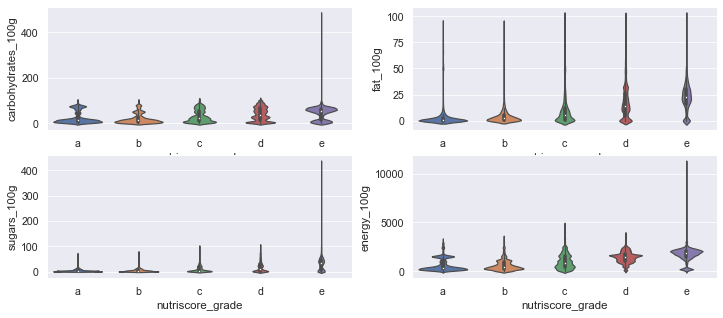

In [799]:
label_order = ['a','b','c','d','e']
fig, axis = plt.subplots(ncols=2, nrows=2, figsize=(12,5))
sns.violinplot(x='nutriscore_grade', y='carbohydrates_100g', data=calorie_measure_usa, ax=axis[0][0], order = label_order)
sns.violinplot(x='nutriscore_grade', y='fat_100g', data=calorie_measure_usa, ax=axis[0][1], order = label_order)
sns.violinplot(x='nutriscore_grade', y='sugars_100g', data=calorie_measure_usa, ax=axis[1][0], order = label_order)
sns.violinplot(x='nutriscore_grade', y='energy_100g', data=calorie_measure_usa, ax=axis[1][1], order = label_order)
plt.show()

What are a,b ,c ,... ?

From the above plot,We could see the sugar,fat,carbs,energy data values are more in nutrition grade d & e towards from up to down where as in a,b in some cases of c it is between towards downwards.Hence nutrition grade d,e come under unhealthy zone.

# Machine learning Analysis 
Logistic Regression 
-----------------------

# Question 8
----------
## Design a logistic regression model that can predict additive contains present or not inanalysying its caloric values and nutrition score.

Prepared a dataframe belowe taht has additive column along with calorie information.

In [800]:
columns_tokeep = ['nutriscore_grade','energy_100g','sugars_100g','fat_100g','proteins_100g','carbohydrates_100g','additives_n']
model2_new_df=open_food_facts[columns_tokeep]
model2_new_df=model2_new_df.dropna()
model2_new_df.head()

,nutriscore_grade,energy_100g,sugars_100g,fat_100g,proteins_100g,carbohydrates_100g,additives_n
3,d,936.0,22.0,8.2,5.1,29.0,0.0
13,b,134.0,3.9,0.3,0.9,5.3,0.0
21,d,1594.0,21.9,22.0,4.6,27.3,0.0
30,a,657.0,27.0,0.0,0.6,36.0,0.0
34,b,598.0,1.0,12.7,1.9,3.9,0.0


In [801]:
model2_new_df.loc[:,"contains_additives"] = np.where(model2_new_df['additives_n']>0.0, 1, 0)
model2_new_df.contains_additives = model2_new_df.contains_additives.astype('category')
model2_new_df.head()

,nutriscore_grade,energy_100g,sugars_100g,fat_100g,proteins_100g,carbohydrates_100g,additives_n,contains_additives
3,d,936.0,22.0,8.2,5.1,29.0,0.0,0
13,b,134.0,3.9,0.3,0.9,5.3,0.0,0
21,d,1594.0,21.9,22.0,4.6,27.3,0.0,0
30,a,657.0,27.0,0.0,0.6,36.0,0.0,0
34,b,598.0,1.0,12.7,1.9,3.9,0.0,0


# SPARK ANALYSIS MLlib

In this analysis,we are checking the columns in the dataframe along with contain_additive column where values are match if it contains 1 ,if no it 0

In [802]:
from pyspark.ml.classification import LogisticRegressionModel
from pyspark.ml.feature import VectorIndexer
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml import Pipeline

In [804]:
spark_model_logistic = spark.createDataFrame(model2_new_df)
spark_model_logistic.printSchema()

root
 |-- nutriscore_grade: string (nullable = true)
 |-- energy_100g: double (nullable = true)
 |-- sugars_100g: double (nullable = true)
 |-- fat_100g: double (nullable = true)
 |-- proteins_100g: double (nullable = true)
 |-- carbohydrates_100g: double (nullable = true)
 |-- additives_n: double (nullable = true)
 |-- contains_additives: long (nullable = true)



Categorial and numerical columns of the dtaset should be passed separately in VEcotor assembler .The categorial value  has to processed through a StringIndexer.After this we will get two extra column feature and lebel

In [805]:
catcols=['nutriscore_grade']
numericalcols = ['energy_100g','sugars_100g','fat_100g','proteins_100g','carbohydrates_100g']
stages = []
for categoricalCol in catcols:
    stringIndexer = StringIndexer(inputCol = categoricalCol, outputCol = categoricalCol + 'Index')
    encoder = OneHotEncoderEstimator(inputCols=[stringIndexer.getOutputCol()], outputCols=[categoricalCol + "classVec"])
    stages += [stringIndexer, encoder]

label_check = StringIndexer(inputCol = 'contains_additives', outputCol = 'additivecheck')
stages += [label_check]

assemblerInputs = [c + "classVec" for c in catcols] + numericalcols
assembler = VectorAssembler(inputCols=assemblerInputs, outputCol="features")
stages += [assembler]

In [806]:
pipeline = Pipeline(stages = stages)
pipelineModel = pipeline.fit(spark_model_logistic)
transformed_columns_lmodel= pipelineModel.transform(spark_model_logistic)

In [807]:
train_logistic_df, test_logistic_df = transformed_columns_lmodel.randomSplit([0.8, 0.2], seed = 100)
print("Training Dataset Count: " + str(train_logistic_df.count()))
print("Test Dataset Count: " + str(test_logistic_df.count()))


Training Dataset Count: 450401
Test Dataset Count: 112967


In [808]:
selectedCols = ['additivecheck', 'features']
transformed_columns_lmodel = transformed_columns_lmodel.select(selectedCols)
transformed_columns_lmodel.printSchema()

root
 |-- additivecheck: double (nullable = false)
 |-- features: vector (nullable = true)



The below dataframe has the two lebel(taking as additivecheck) and other has features columns,it will predict the test data  which is splited above

In [809]:
pd.DataFrame(transformed_columns_lmodel.take(5), columns=transformed_columns_lmodel.columns)

,additivecheck,features
0,0.0,"[1.0, 0.0, 0.0, 0.0, 936.0, 22.0, 8.2, 5.1, 29.0]"
1,0.0,"[0.0, 0.0, 0.0, 0.0, 134.0, 3.9, 0.3, 0.9, 5.3]"
2,0.0,"[1.0, 0.0, 0.0, 0.0, 1594.0, 21.9, 22.0, 4.6, ..."
3,0.0,"[0.0, 0.0, 0.0, 1.0, 657.0, 27.0, 0.0, 0.6, 36.0]"
4,0.0,"[0.0, 0.0, 0.0, 0.0, 598.0, 1.0, 12.7, 1.9, 3.9]"


In [810]:
from pyspark.ml.classification import LogisticRegression
lr = LogisticRegression(featuresCol = 'features', labelCol = 'additivecheck', maxIter=30)
lrModel = lr.fit(train_logistic_df)

In [811]:
pred = lrModel.transform(test_logistic_df)

In [812]:
pred.select('additivecheck','rawPrediction', 'prediction', 'probability').show(5)

+-------------+--------------------+----------+--------------------+
|additivecheck|       rawPrediction|prediction|         probability|
+-------------+--------------------+----------+--------------------+
|          0.0|[0.89345995204885...|       0.0|[0.70960366881898...|
|          0.0|[0.89345995204885...|       0.0|[0.70960366881898...|
|          0.0|[0.89345995204885...|       0.0|[0.70960366881898...|
|          0.0|[0.89345995204885...|       0.0|[0.70960366881898...|
|          0.0|[0.89345995204885...|       0.0|[0.70960366881898...|
+-------------+--------------------+----------+--------------------+
only showing top 5 rows



In [813]:
evaluator = BinaryClassificationEvaluator(labelCol="additivecheck", metricName="areaUnderROC")
logistic_reg_prediction_percentage = evaluator.evaluate(pred)
print("The accuracy score of the above analysis is :" + str(logistic_reg_prediction_percentage))

The accuracy score of the above analysis is :0.6684266578096725


.The accuracy score of the above analysis is 67%.From the above anaysis We could see Logistic regression gave us a less accuracy than classifier method we analysed above but It did a good job predicting more that 50% of the datas from test data

Question 9
------------
Which is the most widely used packaging type in the world? In which country most plastic packaging is used? Find top 10 eco-friendly countries?

In [814]:
cols_to_keep = ["packaging","countries_en","product_name"]
packaging_df = open_food_facts[cols_to_keep]
packaging_df = packaging_df.dropna()

In [815]:
plastic_packaging = packaging_df.loc[packaging_df["packaging"].str.contains("plastique")]
cardboard_packaging = packaging_df.loc[packaging_df["packaging"].str.contains("carton")]
canned_packaging = packaging_df.loc[packaging_df["packaging"].str.contains("conserve")]
num_canned = canned_packaging["packaging"].count()
num_cardboard = cardboard_packaging["packaging"].count()
num_plastic = plastic_packaging["packaging"].count()
packaging_df=packaging_df["packaging"].groupby(packaging_df["packaging"]).count().sort_values(ascending=False)

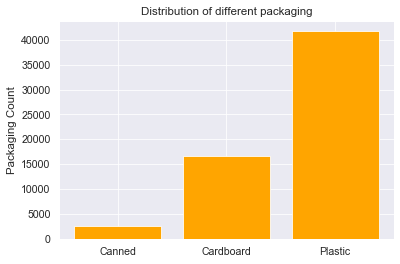

In [816]:
plt.title("Distribution of different packaging")
plt.bar(range(3), [num_canned,num_cardboard,num_plastic], color='orange')
plt.xticks(range(3), ["Canned", "Cardboard", "Plastic"])
plt.ylabel("Packaging Count")
plt.show()

We can see that plastic is definitely the predominant type of packaging in world - around double the amount of the other two categories combined.

But that doesn't tell us much. What we can do, however is see whether these different types of packaging affect the nutrition score. Let's plot a histogram of the distributions of the nutrition scores across different packaging types.

Also, according to the french nutri-score system, the healthier products should have values close to 0.

In [817]:
cols_to_keep = ["packaging_tags","countries_en"]
packaging_list = open_food_facts[cols_to_keep]
packaging_list = packaging_list.dropna()

packaging_list['packaging_tags'] = packaging_list['packaging_tags'].str.split(',')
packaging_list = packaging_list.set_index('countries_en')

packaging_list = (packaging_list.packaging_tags.apply(pd.Series)
              .stack()
              .reset_index(level=1, drop=True)
              .to_frame('packaging'))

packaging_list = packaging_list.reset_index(level=0)
packaging_list = packaging_list.reset_index(level=0)

Taking highest score to set grades manually for every packaging type.

In [818]:
packaging_to_grade = {
    'carton': 60,
    'cardboard': 60,
    'paper': 50,
    'papier':50,
    'verre':40,
    'glass':40,
    'metal':30,
    'canette':30, #canette is considered as metal
    'aluminium':20,
    'plastique': 10,
    'plastic': 10,
    'sachet-plastique': 10,
    'plastic-bag': 10
}

We are filtering countries that have less data. After that we hve duplicated the grade column and made as products_count.
Then we are grouping the countries and find countries with more than 10 products.

In [819]:
packaging_grade_df = pd.DataFrame.from_dict(packaging_to_grade, orient='index')
packaging_grade_df = packaging_grade_df.reset_index()
packaging_grade_df = packaging_grade_df.rename(columns={"index": "packaging", 0: "grade"})

grade_by_packaging = packaging_list.merge(packaging_grade_df, how='left', left_on='packaging', right_on='packaging')

grade_by_packaging = grade_by_packaging[grade_by_packaging['grade'].notnull()]

grade_by_packaging['products_count'] = grade_by_packaging['grade']

grade_by_packaging_count = grade_by_packaging.groupby('countries_en').agg({'grade':'mean', 'products_count':'count'})

final_grade_by_packaging = grade_by_packaging_count[grade_by_packaging_count['products_count'] >= 10]

After sorting the values taking out these rows that do not represent countries.

In [820]:
final_grade_by_packaging = final_grade_by_packaging.sort_values(by='grade', ascending=False)
final_grade_by_packaging = final_grade_by_packaging.reset_index(level=0)

final_grade_by_packaging = final_grade_by_packaging[final_grade_by_packaging['countries_en'] != 'nan']
final_grade_by_packaging = final_grade_by_packaging[final_grade_by_packaging['countries_en'] != 'European union']

Plotting top 10 eco-friendly and top 10 non-eco-friendly countries

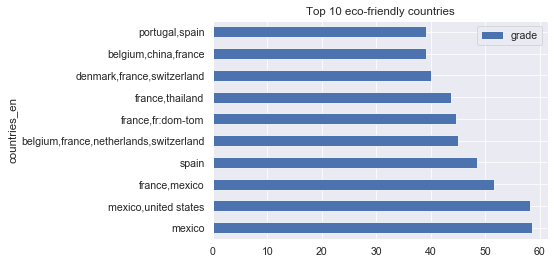

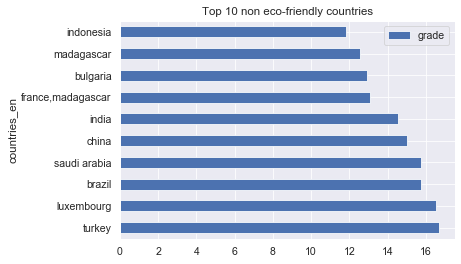

In [821]:
final_grade_by_packaging_top_10 = final_grade_by_packaging.head(10)
final_grade_by_packaging_top_10.plot.barh(x='countries_en', y='grade', title='Top 10 eco-friendly countries')

final_grade_by_packaging_bottom_10 = final_grade_by_packaging.tail(10)
final_grade_by_packaging_bottom_10.plot.barh(x='countries_en', y='grade', title='Top 10 non eco-friendly countries')

Plotting top 10 eco-friendly and top 10 non-eco-friendly countries

## Question 10
## Alcohol content in number of products?

In [822]:
alcohol_clean = open_food_facts[open_food_facts.product_name.notnull()]
alcohol_clean = alcohol_clean[alcohol_clean.countries_en.notnull()]
alcohol_clean = alcohol_clean[alcohol_clean.alcohol_100g.notnull()]

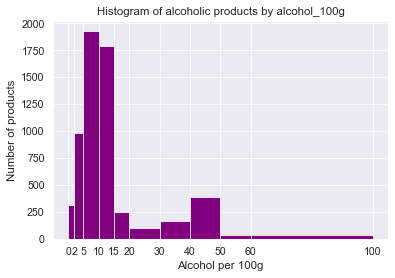

In [823]:
font = {'fontname':'Arial', 'size':'12'}
title_font = {'fontname':'Arial', 'weight' : 'bold','size':'14'}
alcohol_clean = alcohol_clean[alcohol_clean.alcohol_100g>0]
plt.hist(alcohol_clean.alcohol_100g, bins = [0,2,5,10, 15,20, 30, 40,50, 60,100],color='purple')
plt.xticks([0,2,5,10, 15,20, 30, 40,50, 60,100])
plt.xlabel('Alcohol per 100g')
plt.ylabel("Number of products")
plt.title("Histogram of alcoholic products by alcohol_100g")
plt.show()

## Question 11
## Are products with 'organic' labels necessary healthy?

In [824]:
organic_labels = open_food_facts[open_food_facts.nutriscore_grade.notna()]
organic_labels.reset_index(inplace=True, drop = True)
organic_labels.head(2)

,code,product_name,packaging,packaging_tags,energy_100g,brands,alcohol_100g,proteins_100g,fiber_100g,salt_100g,...,saturated_fat_100g,fat_100g,categories_en,labels_tags,countries_en,ingredients_text,ingredients_from_palm_oil_n,additives_n,nutriscore_score,categories_en.1
0,0000000000100,moutarde au moût de raisin,NaN,NaN,936.0,courte paille,0.0,5.1,0.0,4.60,...,2.2,8.2,"Groceries,Condiments,Sauces,Mustards",fr:delois-france,france,eau graines de téguments de moutarde vinaigre ...,0.0,0.0,18.0,"Groceries,Condiments,Sauces,Mustards"
1,0000000000949,Salade de carottes râpées,NaN,NaN,134.0,NaN,0.0,0.9,0.0,0.42,...,0.1,0.3,"Meals,Prepared vegetables,Grated carrots,Seaso...",NaN,france,NaN,0.0,0.0,1.0,"Meals,Prepared vegetables,Grated carrots,Seaso..."


In [831]:
df_organic = organic_labels[organic_labels.labels_tags.notna()]
df_organic.reset_index(inplace=True, drop=True)

In [832]:
def get_category(string, column, dataframe): 
    idx_list = []
    for idx, row in dataframe.iterrows():
        if row[column] is not np.nan and string in row[column]:
            idx_list.append(idx)
    return idx_list

Using the get_category method, fetching the stri ng containing "organic" word in it and filling additives, fiber with 0 value.

In [833]:
organic1 = get_category('en:organic', 'labels_tags', df_organic)
organic2 = get_category('en:eu-organic', 'labels_tags', df_organic)
organic = list(set(organic1).union(set(organic1)))
df_organic = df_organic.iloc[organic, :][['additives_n', 'energy_100g','proteins_100g', 'salt_100g', 'fiber_100g','sugars_100g','nutriscore_grade']]
df_organic.additives_n = df_organic.additives_n.fillna(0)
df_organic.fiber_100g = df_organic.fiber_100g.fillna(0)
df_organic = df_organic[df_organic.sugars_100g.notna()]

making temp dataframe which contains the nutrients on which we will do the analysis and creating copy of tmp to temp_all dataframe which is of "overall" kind.

In [834]:
tmp = organic_labels[['additives_n', 'energy_100g', 'proteins_100g', 'salt_100g','fiber_100g', 'sugars_100g']]
tmp = tmp[tmp.additives_n.notna()]
tmp.fiber_100g.fillna(0, inplace=True)

temp = df_organic.copy()
temp.drop('nutriscore_grade', axis=1, inplace=True)
temp.reset_index(inplace=True, drop=True)
temp['kind'] = 'organic'
temp_all = tmp.copy()
temp_all.reset_index(inplace=True, drop=True)
temp_all['kind'] = 'overall'


concatinating two dataframes of organic and overall kind

In [835]:
melted = pd.concat([temp, temp_all])
melted.kind = melted.kind.astype('category')

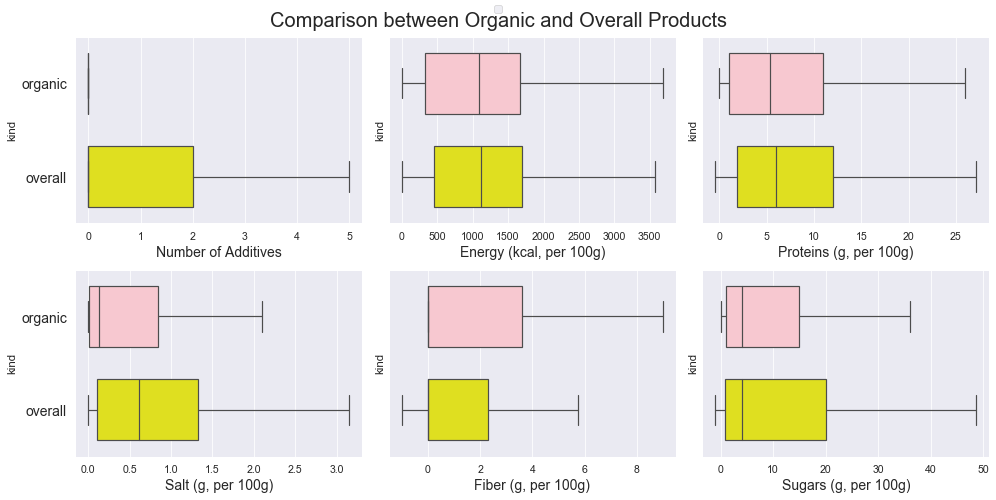

In [837]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(14, 7), sharey=True)

sns.boxplot(y='kind',x='additives_n', data=melted, showfliers=False, ax=axes[0, 0], palette=['pink', 'yellow'], width=0.65)
axes[0, 0].set_xlabel('Number of Additives', fontdict={'fontsize': 14})
axes[0, 0].set_yticklabels(['Organic', 'Overall'], fontsize=14)
sns.boxplot(y='kind',x='energy_100g', data=melted, showfliers=False, ax=axes[0, 1], palette=['pink', 'yellow'], width=0.65)
axes[0, 1].set_xlabel('Energy (kcal, per 100g)', fontdict={'fontsize': 14})
sns.boxplot(y='kind',x='proteins_100g', data=melted, showfliers=False, ax=axes[0, 2], palette=['pink', 'yellow'], width=0.65)
axes[0, 2].set_xlabel('Proteins (g, per 100g)', fontdict={'fontsize': 14})
sns.boxplot(y='kind',x='salt_100g', data=melted, showfliers=False, ax=axes[1, 0], palette=['pink', 'yellow'], width=0.65)
axes[1, 0].set_xlabel('Salt (g, per 100g)', fontdict={'fontsize': 14})
axes[1, 0].set_yticklabels(['Organic', 'Overall'], fontsize=14)
sns.boxplot(y='kind',x='fiber_100g', data=melted, showfliers=False,ax=axes[1, 1], palette=['pink', 'yellow'], width=0.65)
axes[1, 1].set_xlabel('Fiber (g, per 100g)', fontdict={'fontsize': 14})
sns.boxplot(y='kind',x='sugars_100g', data=melted, showfliers=False, ax=axes[1, 2], palette=['pink', 'yellow'], width=0.65)
axes[1, 2].set_xlabel('Sugars (g, per 100g)', fontdict={'fontsize': 14})

fig.suptitle('Comparison between Organic and Overall Products', fontsize=20) 
fig.tight_layout() 
fig.subplots_adjust(top=0.93)

handles, labels = axes[1, 2].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center')
plt.show()

Grouping the additives by nutriscore grade and dropping unwanted columns and calculating the rank percentage and nutriscore ranks

In [838]:
tmp = organic_labels[['code', 'nutriscore_grade']].groupby(by='nutriscore_grade').count().reset_index()
tmp['overall'] = tmp.code.apply(lambda x: x / tmp.code.sum())
tmp2 = df_organic[['additives_n', 'nutriscore_grade']].groupby(by='nutriscore_grade').count().reset_index()
tmp2['organic'] = tmp2.additives_n.apply(lambda x: x / tmp2.additives_n.sum())
organic_labels = pd.merge(tmp.drop('code', axis=1), tmp2.drop('additives_n', axis=1))
tmp = pd.melt(organic_labels, id_vars='nutriscore_grade', var_name='category', value_name='rank_percentage')

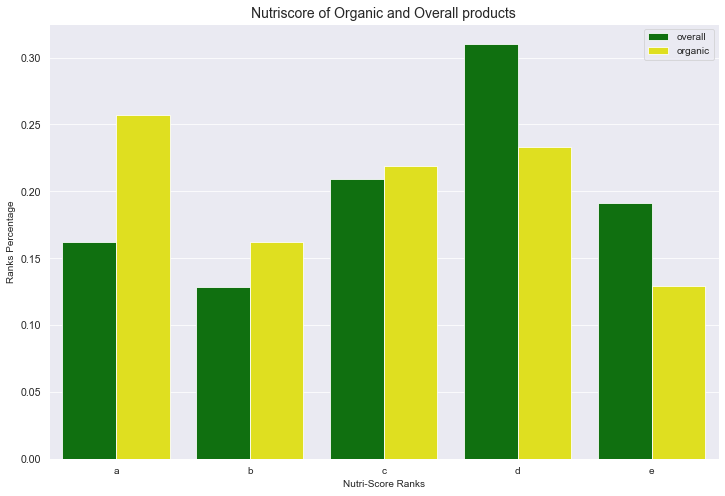

In [839]:
plt.figure(figsize=(12, 8))
sns.barplot(x="nutriscore_grade", y="rank_percentage", hue="category", data=tmp, palette=['green', 'yellow'])
plt.xlabel('Nutri-Score Ranks', fontdict={'fontsize': 10})
plt.ylabel('Ranks Percentage', fontdict={'fontsize': 10})
plt.xticks(fontsize=10)
plt.title('Nutriscore of Organic and Overall products', fontdict={'fontsize': 14})
plt.legend(loc='best', fontsize=10)
plt.show()

Again a, b, c,...?

## Question 12
## Find top 10 ingredients in food products.


Splitting all entries with comma separeted columns in the 'ingredients_text' column and create a new row for each in one new dataframe

In [840]:
ingredients_df = open_food_facts.dropna(subset=['ingredients_text'])

In [841]:
ingredients_df = ingredients_df['ingredients_text'].str.replace('(\W)',',').str.replace(',,,',',').str.replace(',,',',')

In [842]:
results = ingredients_df.str.split(',').values.tolist()
flat_results = [item for sublist in results for item in sublist]
count = Counter(flat_results)

Looking at the most common ingredients, there are several that 'ingredients' that cannot be considered as one so deleting them. There is lot of words in french language. Renaming that column so that it will reflect the true count.

In [843]:
del count['de']
del count['']
del count['and']
del count['organic']
del count['d']
del count['natural']
top10 = count.most_common(10)

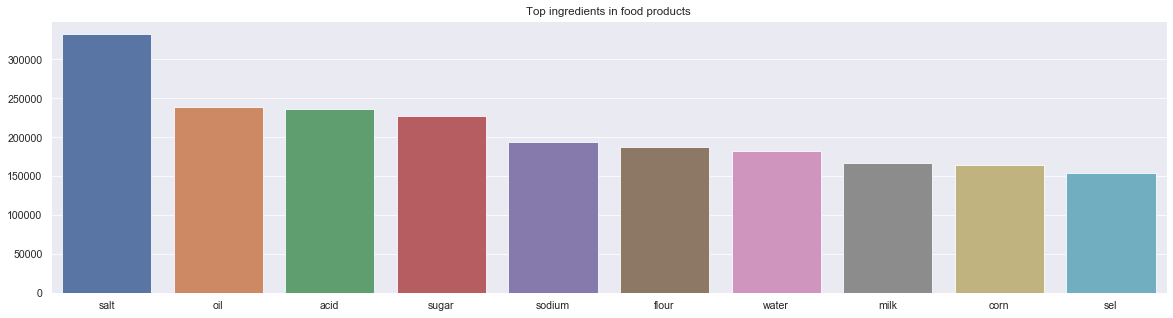

In [844]:
plt.figure(figsize=(20, 5))
labels,count = zip(*top10)
xs = np.arange(len(labels)) 
sns.barplot(xs,count)
plt.xticks(xs, labels)
plt.title("Top ingredients in food products")
plt.show()

# KNN CLUSTERING 

## Question 13
## Scatter plot by food grade using amounts of protein, carbohydrate, and fat
When it comes to grading food, in my opinion, I'll first look at macronutrients. So, firstly, let's create a 3D scatter plot by food grade using amounts of protein, carbohydrate, and fat as axes.

In [845]:
features = ['proteins_100g', 'fat_100g', 'carbohydrates_100g']

Removing incorrect items with amount of those features which are greater than 100gram

In [846]:
food_cluster = open_food_facts[features + ['nutriscore_grade']].dropna(how='any')
food_cluster = food_cluster[(food_cluster['proteins_100g']<=100) & (food_cluster['proteins_100g']>=0) & (food_cluster['fat_100g']<=100) & (food_cluster['carbohydrates_100g']<=100)]
food_cluster_grade = food_cluster['nutriscore_grade'].copy()
food_cluster_grade[food_cluster_grade == 'a'] = 1
food_cluster_grade[food_cluster_grade == 'b'] = 2
food_cluster_grade[food_cluster_grade == 'c'] = 3
food_cluster_grade[food_cluster_grade == 'd'] = 4
food_cluster_grade[food_cluster_grade == 'e'] = 5

Text(0.5, 0, 'Carb')

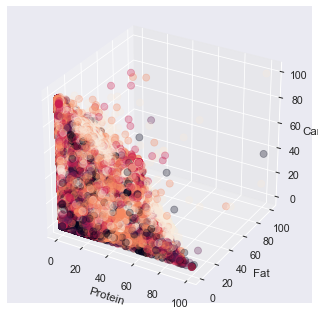

In [847]:
fig2 = plt.figure(figsize=(12, 12))
ax2 = fig2.add_subplot(222, projection='3d')
xs = food_cluster['proteins_100g']
ys = food_cluster['fat_100g']
zs = food_cluster['carbohydrates_100g']
ax2.scatter(xs, ys, zs, c=food_cluster_grade, s=50, alpha=0.3) 
ax2.set_xlabel('Protein')
ax2.set_ylabel('Fat')
ax2.set_zlabel('Carb')

Since We can't analyze from above clustering and directly correlated with nutrients. 
This is because there are products like oils, all of which are purely fats, that can be have multiple grades. Applying KMeans for more accuracy

In [848]:
kmeans_clustering = KMeans(n_clusters=5)
kmeans_clustering.fit(food_cluster[features])
y_kmeans_clustering = kmeans_clustering.predict(food_cluster[features])

Text(0.5, 0, 'Carb')

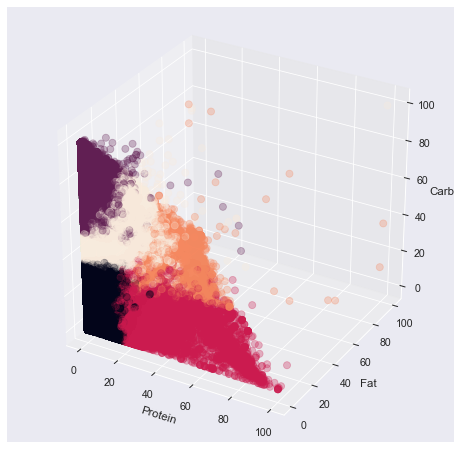

In [849]:
fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot(111, projection='3d')
ax1.scatter(xs, ys, zs, c=y_kmeans_clustering, s=50, alpha=0.3)
ax1.set_xlabel('Protein')
ax1.set_ylabel('Fat')
ax1.set_zlabel('Carb')

From the above 3 D plot we can see clustering formed in 5 regions. 

#### Challenges
Almost 50% of our time was spent in cleaning and processing the data sets as the data is downloaded from a real world website which was unexpected for us. There are 163 features in this dataset but, more than 60% of columns contain missing values which made it difficult for us to include those columns in the analysis. In this dataset there are many columns which have comma separated values, values with different language and symbols. So ,filtering  oout those was the main challenge for us. 


#### What we learned?
We were a bit overwhelmed initially by the sheer amount of data alone, but as we progressed through the project the analysis got equally interesting and kept us involved.
We take a few important learnings from the project, specifically related to data processing and cleaning. Analysis  takes a lot less time as compared to cleaning and processing of data. 
#### Here we learned following things:
--------------------------------
1. Cleaning dataset with huge missing, NA and comma separated values 
2. Implementation of KNN and 3d scatter plot
3. Machine Learning using pyspark (Logistic regression, decision tree classifier, random forest classifier)
4. Some more functions of pandas ( Axes3D)
